In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 為了顯示的漂亮, 我刻意的把印出來的 row 只顯示 15 個和 column 只顯示 10 個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
# 為了顯示的漂亮, 有時候 sklearn 會提示一下 Future Warning
# 我也把關掉了
import warnings
warnings.filterwarnings('ignore')
# 使用 scikit-learn 提供的鳶尾花資料庫
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2


In [2]:
df = df.drop(["petal width (cm)", "sepal width (cm)"], axis = 1)
df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
...,...,...,...
143,6.8,5.9,2
144,6.7,5.7,2


In [3]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分 (1. 訓練資料 2. 測試資料)
data = df.drop(["target"], axis = 1)
data_train, data_test, target_train, target_test = train_test_split(data,
                                                                    df['target'],
                                                                    test_size=0.1)

In [4]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf = clf.fit(data_train, target_train)

In [5]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測　　:", list(predict))
print("正確標籤:", list(target_test))
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")

預測　　: [0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2]
正確標籤: [0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2]
正確率:  86.66666666666667 %


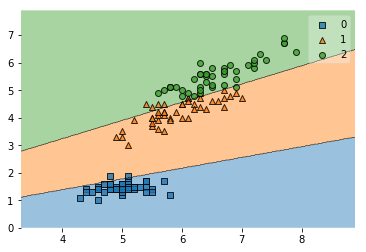

In [6]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
plot_decision_regions(X=np.array(data_train),
y=np.array(target_train),
clf=clf)

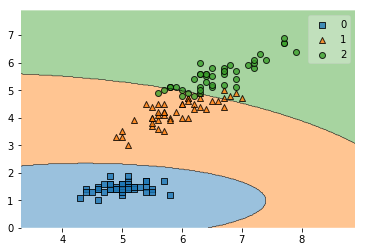

In [7]:
# 由於我們的特徵不是不連續的整數, 我們必須使用 GaussianNB 來
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(data_train, target_train)
plot_decision_regions(X=np.array(data_train),
y=np.array(target_train),
clf=clf)

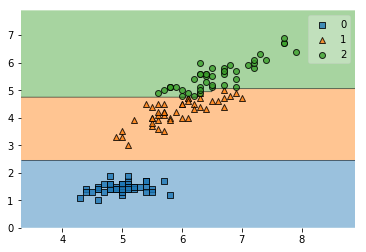

In [8]:
from sklearn.tree import DecisionTreeClassifier
# 讀者可以試試看從 max_depth = 1 慢慢往上調整，觀看決策邊界的變化
clf = DecisionTreeClassifier()
clf = clf.fit(data_train, target_train)
plot_decision_regions(X=np.array(data_train),
y=np.array(target_train),
clf=clf)

In [9]:
from numpy import random
# 可以用 numpy 快速產生隨機, 第一個參數是你產生有多少種類
# 第二個參數是你要幾個
# x1 是我們的第一特徵, 你可以想像成帥
# x2 是我們的第二特徵, 你可以想像成有才華
x1 = random.choice([True, False], 100)
x2 = random.choice([True, False], 100)
# y 是我們的 target, 你可以想像成會不會喜歡
y = np.logical_xor(x1, x2)
df = pd.DataFrame(columns = ["x1", "x2", "y"])
df["x1"] = x1
df["x2"] = x2
df["y"] = y
df = df.astype(int)
df

,x1,x2,y
0,1,1,0
1,0,1,1
2,0,1,1
3,1,1,0
4,1,1,0
5,0,0,0
6,1,1,0
...,...,...,...
93,0,0,0
94,0,1,1


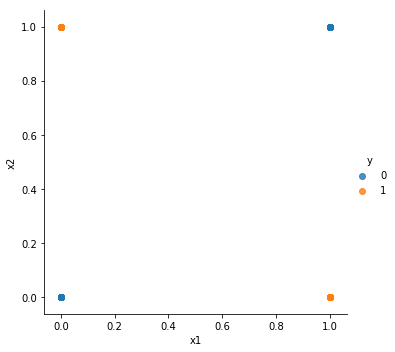

In [10]:
import seaborn as sns
sns.lmplot(x = "x1", y = "x2", hue = "y", data=df, fit_reg = False)

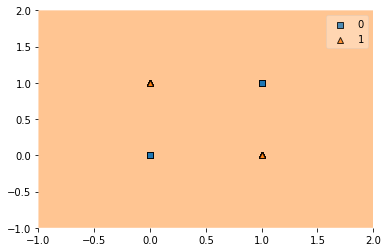

In [11]:
clf = Perceptron()
clf = clf.fit(df.drop(["y"], axis = 1), df["y"])
plot_decision_regions(X=np.array(df.drop(["y"], axis = 1)),
                                y=np.array(df["y"]),
                                clf=clf)